__[Medium Article Link](https://medium.com/@handikaekiw/unlocking-the-potential-of-pycaret-a-low-code-machine-learning-library-c92dd0570167)__

In [37]:
%pip install pycaret[full]

In [74]:
import pandas as pd
from pycaret.classification import *
import seaborn as sns

In [75]:
url = 'https://raw.githubusercontent.com/ekiwinataa/Capstone3_TelcoChurnAnalysis_ML/main/telco_customer_churn.csv'
df = pd.read_csv(url)
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [76]:
df[['OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport']] = df[['OnlineSecurity', 'OnlineBackup',
                                              'DeviceProtection', 'TechSupport']].replace(
                                                  {'No internet service' : 'No'})

In [77]:
pd.set_option('display.max_colwidth', 1)

# Unique values in each column
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=[['Column Name', 'Number of Unique', 'Unique Sample']],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Dependents,2,"[Yes, No]"
1,tenure,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1, 48, 13, 58, 7, 4, 70, 34, 31, 37, 15, 71, 10, 43, 22, 33, 69, 54, 63, 55, 66, 56, 32, 26, 24, 2, 51, 23, 49, 28, 36, 45, 42, 6, 61, 59, 67, 65, 0, 16, 52, 41, 25, 62, 20, 50, 30, 60, 19, 35, 57, 27, 44, 53, 12, 46, 39, 29, 38, 68, 21]"
2,OnlineSecurity,2,"[No, Yes]"
3,OnlineBackup,2,"[No, Yes]"
4,InternetService,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,2,"[Yes, No]"
6,TechSupport,2,"[Yes, No]"
7,Contract,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,2,"[Yes, No]"
9,MonthlyCharges,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7, 44.05, 73.5, 40.3, 33.6, 96.25, 70.45, 30.55, 44.8, 20.0, 81.5, 94.35, 35.3, 50.7, 106.05, 56.3, 20.65, 98.9, 40.2, 81.2, 19.45, 116.1, 55.2, 94.45, 84.85, 19.6, 79.0, 74.7, 30.4, 55.8, 104.5, 70.55, 55.25, 96.65, 88.85, 109.25, 104.75, 74.4, 79.4, 74.1, 73.05, 94.6, 70.35, 79.6, 79.5, 90.7, 81.0, 87.75, 118.65, 24.8, 105.25, 57.8, 19.0, 25.7, 54.2, 44.85, 19.95, 81.05, 20.35, 85.25, 67.45, 100.3, 20.95, 105.2, 26.35, 82.15, 102.6, 106.15, 23.95, 115.8, 66.85, 90.35, 89.85, 73.35, 104.45, 35.45, 88.4, 70.5, 25.1, 39.0, 83.25, 74.3, 54.3, 50.45, 86.0, 19.55, 103.5, 91.7, 64.85, 99.65, 68.75, 106.25, 75.9, 94.4, ...]"


In [78]:
df['Contract'] = df['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})

In [79]:
pd.set_option('display.max_colwidth', 1)

# Unique values in each column
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=[['Column Name', 'Number of Unique', 'Unique Sample']],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Dependents,2,"[Yes, No]"
1,tenure,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1, 48, 13, 58, 7, 4, 70, 34, 31, 37, 15, 71, 10, 43, 22, 33, 69, 54, 63, 55, 66, 56, 32, 26, 24, 2, 51, 23, 49, 28, 36, 45, 42, 6, 61, 59, 67, 65, 0, 16, 52, 41, 25, 62, 20, 50, 30, 60, 19, 35, 57, 27, 44, 53, 12, 46, 39, 29, 38, 68, 21]"
2,OnlineSecurity,2,"[No, Yes]"
3,OnlineBackup,2,"[No, Yes]"
4,InternetService,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,2,"[Yes, No]"
6,TechSupport,2,"[Yes, No]"
7,Contract,3,"[0, 2, 1]"
8,PaperlessBilling,2,"[Yes, No]"
9,MonthlyCharges,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7, 44.05, 73.5, 40.3, 33.6, 96.25, 70.45, 30.55, 44.8, 20.0, 81.5, 94.35, 35.3, 50.7, 106.05, 56.3, 20.65, 98.9, 40.2, 81.2, 19.45, 116.1, 55.2, 94.45, 84.85, 19.6, 79.0, 74.7, 30.4, 55.8, 104.5, 70.55, 55.25, 96.65, 88.85, 109.25, 104.75, 74.4, 79.4, 74.1, 73.05, 94.6, 70.35, 79.6, 79.5, 90.7, 81.0, 87.75, 118.65, 24.8, 105.25, 57.8, 19.0, 25.7, 54.2, 44.85, 19.95, 81.05, 20.35, 85.25, 67.45, 100.3, 20.95, 105.2, 26.35, 82.15, 102.6, 106.15, 23.95, 115.8, 66.85, 90.35, 89.85, 73.35, 104.45, 35.45, 88.4, 70.5, 25.1, 39.0, 83.25, 74.3, 54.3, 50.45, 86.0, 19.55, 103.5, 91.7, 64.85, 99.65, 68.75, 106.25, 75.9, 94.4, ...]"


In [80]:
from imblearn.combine import SMOTEENN

# Setup environment
s = setup(
    data=df,
    target='Churn',
    experiment_name = 'Churn Prediction',
    session_id=42,  # set session id for reproducibility
    train_size=0.75,  # 75% for training, 25% for testing
    categorical_features=['Dependents','OnlineSecurity', 'OnlineBackup', 'InternetService',
                          'DeviceProtection','TechSupport','PaperlessBilling'],  # specify categorical feature columns
    numeric_features=['tenure', 'MonthlyCharges', 'Contract'],  # specify numeric feature columns
    normalize=True,  # normalize the dataset
    normalize_method='minmax',  # normalization method
    fix_imbalance=True,  # imbalance method
    fix_imbalance_method=SMOTEENN() # specify imbalance method
    # date_features=None,  # specify date feature columns
    # ignore_features=None,  # specify any columns to ignore
    # remove_outliers=True,  # remove outliers from the dataset
    # outliers_threshold=0.05,  # threshold for outlier removal
    # remove_multicollinearity=True,  # remove multicollinear features
    # multicollinearity_threshold=0.9,  # threshold for multicollinearity removal
    # create_clusters=True,  # create clusters in the dataset
    # cluster_iter=20,  # number of iterations for cluster creation
    # polynomial_features=True,  # create polynomial features
    # polynomial_degree=2,  # degree of polynomial features
    # trigonometry_features=True,  # create trigonometric features
    # feature_interaction=True,  # create feature interactions
    # feature_ratio=True,  # create feature ratios
    # interaction_threshold=0.01,  # threshold for feature interaction
)


,Description,Value
0,Session id,42
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(4930, 11)"
5,Transformed data shape,"(4577, 13)"
6,Transformed train set shape,"(3344, 13)"
7,Transformed test set shape,"(1233, 13)"
8,Ordinal features,6
9,Numeric features,3


In [81]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7522,0.8268,0.7355,0.5271,0.6131,0.4384,0.4525,0.5600
catboost,CatBoost Classifier,0.7509,0.8332,0.7527,0.5242,0.6176,0.4418,0.4579,6.4480
et,Extra Trees Classifier,0.7495,0.8164,0.7284,0.5230,0.6085,0.4317,0.4448,0.8420
gbc,Gradient Boosting Classifier,0.7425,0.8350,0.7801,0.5122,0.6181,0.4363,0.4586,0.5570
xgboost,Extreme Gradient Boosting,0.7425,0.8246,0.7304,0.5132,0.6022,0.4205,0.4354,0.7770
lightgbm,Light Gradient Boosting Machine,0.7409,0.8246,0.7375,0.5112,0.6032,0.4204,0.4365,1.0700
ada,Ada Boost Classifier,0.7376,0.8326,0.8126,0.5061,0.6235,0.4386,0.4677,0.7420
qda,Quadratic Discriminant Analysis,0.7322,0.8161,0.7569,0.5003,0.6010,0.4123,0.4339,0.4730
nb,Naive Bayes,0.7298,0.8237,0.7811,0.4972,0.6069,0.4165,0.4419,0.4460
dt,Decision Tree Classifier,0.7273,0.7248,0.7193,0.4929,0.5845,0.3921,0.4081,0.4760


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [82]:
lr_model = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6946,0.8284,0.7778,0.4583,0.5768,0.3619,0.3930
1,0.7162,0.8574,0.9091,0.4839,0.6316,0.4339,0.4913
2,0.7081,0.8439,0.8283,0.4740,0.6029,0.3981,0.4370
3,0.6595,0.8266,0.8182,0.4286,0.5625,0.3257,0.3716
4,0.6865,0.8179,0.8384,0.4536,0.5887,0.3698,0.4156
5,0.7081,0.8616,0.8687,0.4751,0.6143,0.4103,0.4589
6,0.6676,0.8069,0.8081,0.4348,0.5654,0.3335,0.3757
7,0.7019,0.7863,0.7551,0.4625,0.5736,0.3642,0.3901
8,0.7317,0.8316,0.7959,0.4968,0.6118,0.4231,0.4506


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [83]:
evaluate_model(lr_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [84]:
tuned_lr = tune_model(lr_model, optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7108,0.8266,0.7576,0.4747,0.5837,0.3795,0.4039
1,0.7405,0.8574,0.8687,0.5089,0.6418,0.4593,0.4998
2,0.7405,0.8445,0.8283,0.5093,0.6308,0.4478,0.4793
3,0.6622,0.8259,0.8081,0.4301,0.5614,0.3260,0.3692
4,0.7081,0.8177,0.8283,0.4740,0.6029,0.3981,0.4370
5,0.7270,0.8569,0.8485,0.4941,0.6245,0.4327,0.4718
6,0.6757,0.8086,0.8081,0.4420,0.5714,0.3448,0.3856
7,0.7073,0.7850,0.7245,0.4671,0.5680,0.3619,0.3819
8,0.7398,0.8299,0.7653,0.5068,0.6098,0.4265,0.4469


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [85]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [86]:
hyperparam_space = {
    'penalty': [None, 'l2', 'l1', 'elastic-net'], #
    'C': [0.001, 0.005, 0.01, 0.05, 0.1],
    'solver': ['liblinear', 'saga', 'lbfgs'],
    'max_iter': [150, 125, 100, 75, 50],
}

tuned_lr2 = tune_model(lr_model, optimize='Recall', custom_grid=hyperparam_space)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6892,0.8291,0.7879,0.4535,0.5756,0.3574,0.3914
1,0.7216,0.8560,0.8788,0.4888,0.6282,0.4333,0.4811
2,0.7297,0.8466,0.8283,0.4970,0.6212,0.4309,0.4649
3,0.6595,0.8274,0.8283,0.4293,0.5655,0.3290,0.3774
4,0.7000,0.8165,0.8586,0.4670,0.6050,0.3954,0.4433
5,0.7189,0.8550,0.8788,0.4860,0.6259,0.4292,0.4777
6,0.6514,0.8043,0.7778,0.4185,0.5442,0.3009,0.3391
7,0.6856,0.7848,0.7551,0.4458,0.5606,0.3403,0.3690
8,0.7182,0.8320,0.7755,0.4810,0.5938,0.3956,0.4221


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [87]:
evaluate_model(tuned_lr2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [88]:
hyperparam_space2 = {
    'penalty': ['l1'],
    'C': [0.005],
    'solver': ['saga'],
    'max_iter': [150],
}

tuned_lr3 = tune_model(lr_model, optimize='Recall', custom_grid=hyperparam_space2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6351,0.7831,0.9394,0.4189,0.5794,0.3323,0.4187
1,0.6135,0.8067,0.9495,0.4052,0.5680,0.3087,0.4030
2,0.6027,0.7958,0.9495,0.3983,0.5612,0.2957,0.3919
3,0.5595,0.7718,0.9495,0.3730,0.5356,0.2459,0.3481
4,0.5757,0.7489,0.9293,0.3802,0.5396,0.2577,0.3497
5,0.6189,0.8162,0.9394,0.4079,0.5688,0.3122,0.4017
6,0.5459,0.7667,0.8990,0.3603,0.5145,0.2143,0.2969
7,0.6070,0.7378,0.9286,0.3974,0.5566,0.2939,0.3817
8,0.6341,0.7931,0.9184,0.4147,0.5714,0.3241,0.4036


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 1 candidates, totalling 10 fits


In [89]:
evaluate_model(tuned_lr3)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

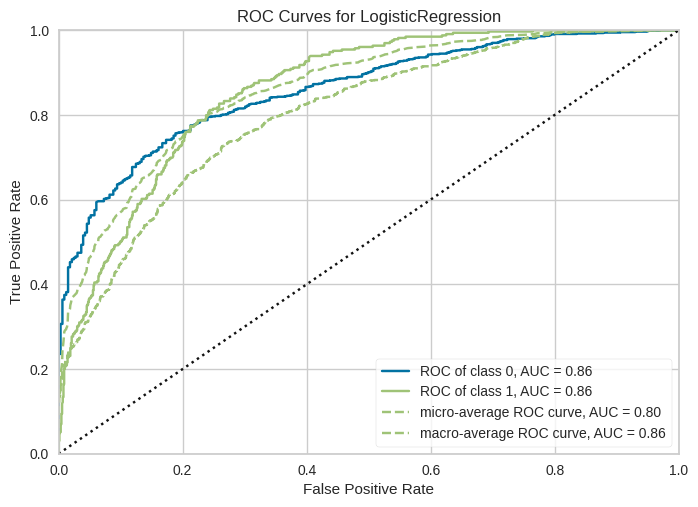

In [99]:
plot_model(tuned_lr, plot = 'auc')

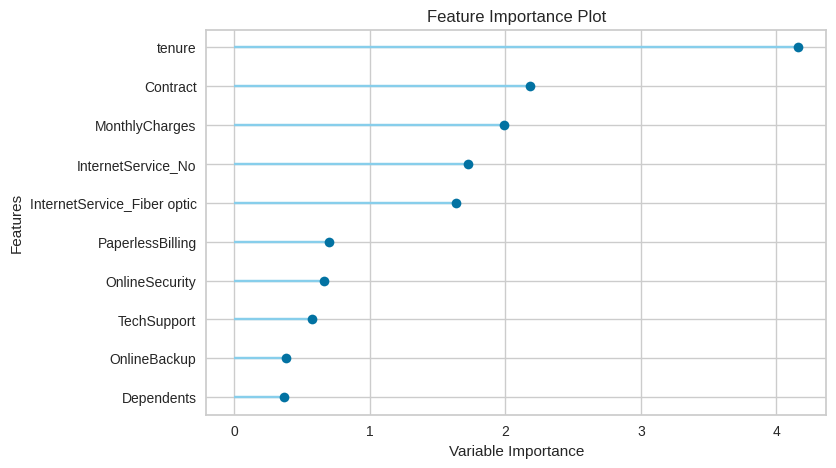

In [100]:
plot_model(tuned_lr, plot = 'feature')

In [90]:
final_lr = finalize_model(tuned_lr)

In [94]:
predictions = predict_model(final_lr, data = df)  # assuming df is a new data

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7158,0.8424,0.7158,0.8085,0.7322,0.4180,0.4620


In [91]:
final_lr2 = finalize_model(tuned_lr2)

In [95]:
predictions2 = predict_model(final_lr2, data = df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7158,0.8424,0.7158,0.8085,0.7322,0.4180,0.4620


In [92]:
final_lr3 = finalize_model(tuned_lr3)

In [96]:
predictions3 = predict_model(final_lr3, data = df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6114,0.8328,0.6114,0.8123,0.6264,0.3049,0.3983


In [93]:
interpret_model(final_lr)

TypeError: ignored

> It is error because it uses SHAP tool to interpret the model. Thus, this function only supports tree based models for binary classification: lightgbm, xgboost, rf, et, catboost, dt.

In [97]:
save_model(final_lr, 'Final LR Model')  # .pkl export
loaded_lr = load_model('Final LR Model')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded
